In [1]:
import pandas as pd 
import numpy as np
import scipy as sc

# 1. Visualización con pyplot y seaborn 

En este notebook realizaremos una expliración visual de los datos que hemos preprocesado en los dos notebooks anteriores, para esto, trabajaremos con el notebook preprocesado en el notebook anterior:

In [2]:
workdata = pd.read_csv('CellsData_clean.csv',index_col=0)
workdata.head()

,cell_1,cell_2,cell_3,cell_4,cell_5,cell_6,cell_7,cell_8,cell_9,cell_10,...,cell_28,cell_29,cell_30,cell_31,cell_33,cell_34,cell_35,cell_36,cell_37,cell_38
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Además, de nuevo crearemos una variable que contenga el conteo de spikes por cada célula:

In [3]:
tot_pulses = [workdata[col].sum() for col in workdata.columns]

Para visualizar los datos utilizaremos las librerías **seaborn** (https://seaborn.pydata.org/) y **matplotlib** (https://matplotlib.org/) de python:

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

## 2 Histograma

A continuación, mostramos dos formas sencillas de graficar histogramas con **Seaborn**:

Text(0, 0.5, 'Densidad')

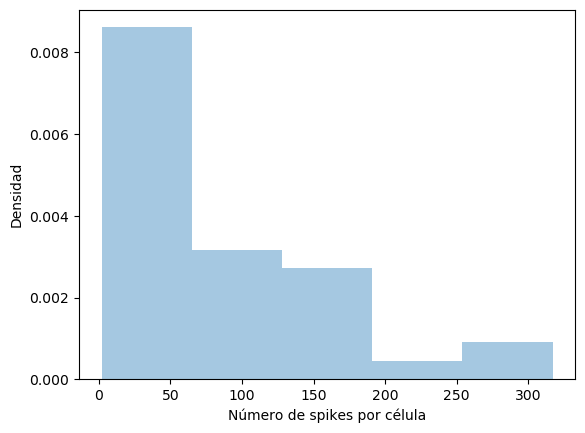

In [13]:
sns.distplot(tot_pulses, #Datos a graficar
             kde=False, # Oculta el KDE 
             bins=5, #número de bins de la gráfica
             norm_hist=True #Normaliza el histograma
            )
plt.xlabel('Número de spikes por célula')
plt.ylabel('Densidad')

## 3 Raster Plot
Una visualización muy común del registro de actividad simultánea de neuronas es la llamada *raster plot*, en la cual se dibuja una línea vertical cada vez que una célula prsentó un disparo.

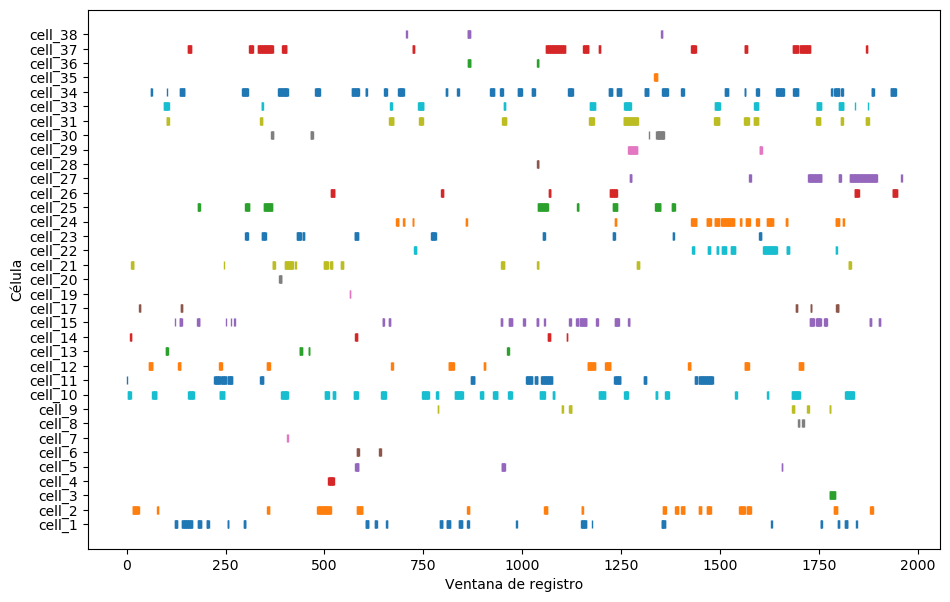

In [6]:
plt.style.use('default')
plt.figure(figsize=(11,7)) #Tamaño de la figura

#Para cada célula, traza una línea vertical cuando esta presenta un spike
for cell in range(len(workdata.columns)):
    spikeInds = sc.where(workdata.iloc[:,cell]==1)[0] #Índices del spike
    plt.plot(spikeInds, (cell)*sc.ones(len(spikeInds)),'|')

ax=plt.gca()
plt.yticks(np.arange(0, len(workdata.columns))) 
ax.set_yticklabels(workdata.columns) #Asigna la etiqueta de cada célula a la gráfica

plt.ylabel('Célula')
plt.xlabel('Ventana de registro')
plt.draw()

## 3 Matríz de Correlación y correlograma

Una forma de inferir conectividad entre un para de células es inferir relaciones funcionales a través de la similaridad de sus patrones de disparo. Una forma de hacer utilizar el **coeficiente de correlación** como medida de similaridad.

El coeficiente de correlación es un número entre -1 y 1 que es un indicador de la variabilidad conjunta entre dos variables.

In [7]:
nRows = workdata.shape[0]
nCells= workdata.shape[1]

### 3.1 Matríz de Correlación
Primero obtendremos la matríz de correlación de nuestros datos, esta es una matríz que en cada entrada contiene el índice de correlación para cada par de células registradas:

In [8]:
cormat = np.corrcoef(np.asarray(workdata).T)
pd.DataFrame(cormat)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.000000,0.013184,-0.025098,-0.024241,-0.029018,-0.020466,-0.009134,-0.017110,-0.031142,0.020838,...,-0.012924,-0.035024,0.069844,-0.075963,-0.033191,0.042287,-0.018296,0.056077,0.010092,0.126098
1,0.013184,1.000000,0.055227,0.123106,0.057888,0.129181,-0.009944,-0.018628,-0.033905,-0.034911,...,-0.014070,-0.038130,0.002491,-0.043608,-0.079811,0.063596,-0.019919,0.072926,-0.041264,0.090860
2,-0.025098,0.055227,1.000000,-0.007449,-0.008917,-0.006289,-0.002807,-0.005258,0.153527,-0.035926,...,-0.003971,-0.010762,-0.011314,-0.025554,-0.022526,0.056827,-0.005622,-0.006597,-0.029932,-0.006893
3,-0.024241,0.123106,-0.007449,1.000000,-0.008612,-0.006074,-0.002711,-0.005078,-0.009243,0.051740,...,-0.003836,-0.010394,-0.010927,-0.024681,-0.021757,-0.037257,-0.005430,-0.006372,-0.028910,-0.006657
4,-0.029018,0.057888,-0.008917,-0.008612,1.000000,0.349010,-0.003245,-0.006079,-0.011064,0.059867,...,-0.004592,-0.012443,-0.013081,0.102924,0.037237,0.162217,-0.006500,-0.007628,-0.034607,-0.007969
5,-0.020466,0.129181,-0.006289,-0.006074,0.349010,1.000000,-0.002289,-0.004287,-0.007803,0.032007,...,-0.003238,-0.008776,-0.009226,-0.020838,-0.018369,0.085237,-0.004584,-0.005380,-0.024408,-0.005621
6,-0.009134,-0.009944,-0.002807,-0.002711,-0.003245,-0.002289,1.000000,-0.001913,-0.003483,0.078123,...,-0.001445,-0.003917,-0.004117,-0.009300,-0.008198,0.072761,-0.002046,-0.002401,-0.010893,-0.002508
7,-0.017110,-0.018628,-0.005258,-0.005078,-0.006079,-0.004287,-0.001913,1.000000,-0.006524,0.048723,...,-0.002707,-0.007337,-0.007713,-0.017421,-0.015357,-0.026297,-0.003833,-0.004498,0.091625,-0.004699
8,-0.031142,-0.033905,0.153527,-0.009243,-0.011064,-0.007803,-0.003483,-0.006524,1.000000,0.036536,...,-0.004928,-0.013354,-0.014038,-0.031708,-0.027951,0.067939,-0.006976,-0.008186,0.133523,-0.008553
9,0.020838,-0.034911,-0.035926,0.051740,0.059867,0.032007,0.078123,0.048723,0.036536,1.000000,...,-0.018500,-0.050134,-0.018240,-0.053917,-0.020249,0.057540,0.087983,-0.030734,0.065569,-0.032109


### 3.2 Heatmap
Finalmente, visualizaremos esta matríz asignando una escala de color al coeficiente de correlación, este tipo de gráficas son comunmente conocidas como *heatmaps*. Para generarlo utilizaremos **seaborn** y la matríza de correlaciones calculada en el paso anterior:

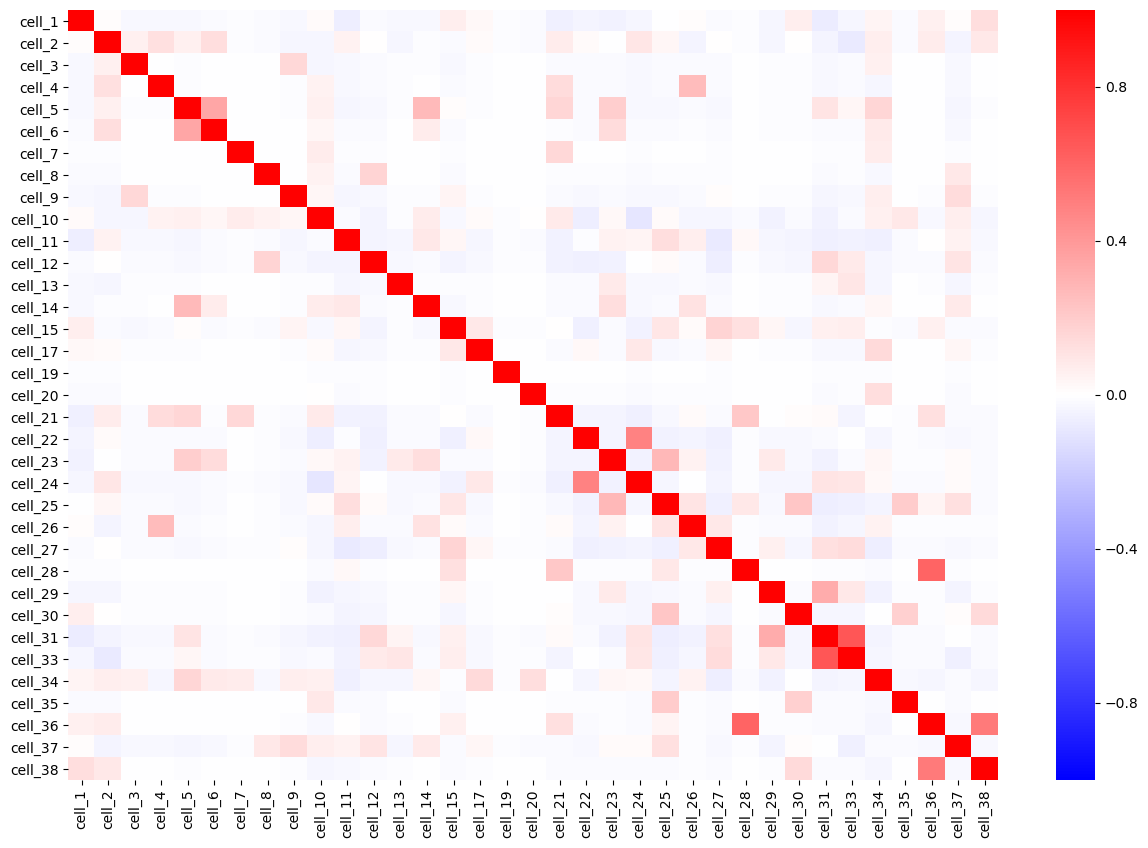

In [9]:
plt.figure(figsize=(15,10)) # Tamaño de la figura

sns.heatmap(cormat, #Matriz de correlacion
            xticklabels=workdata.columns, #Etiquetas de la gráfica
            yticklabels=workdata.columns, #Etiquetas de la gráfica
            vmin=-1, #valor mínimo
            vmax=1,  #valor máximo
            cmap='bwr' #escala de color
             )

En la figura generada, vemos representados con colores rojos los pares de células que tienen un índice de correlación positivo alto, mientras que los tonos más pálidos indican que el coeficiente de correlación entre las dos células en cuestión es cercano a cero.